#Task:
Mixture of Gaussian, EM-Algorithm
<br>
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GMM
import seaborn as sns; sns.set()
from matplotlib.patches import Ellipse
import mog
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

##Dataset 1

In [3]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data = data[1:, :]
    #data

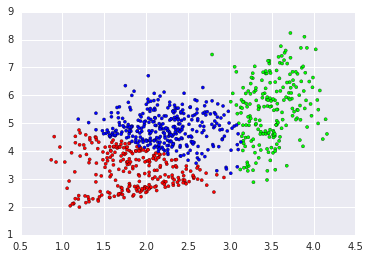

In [4]:
gmm = GMM(n_components=3).fit(data)
labels = gmm.predict(data)
plt.scatter(data[:,0], data[:,1], s=10, c = labels, cmap='brg_r')

probs = gmm.predict_proba(data)

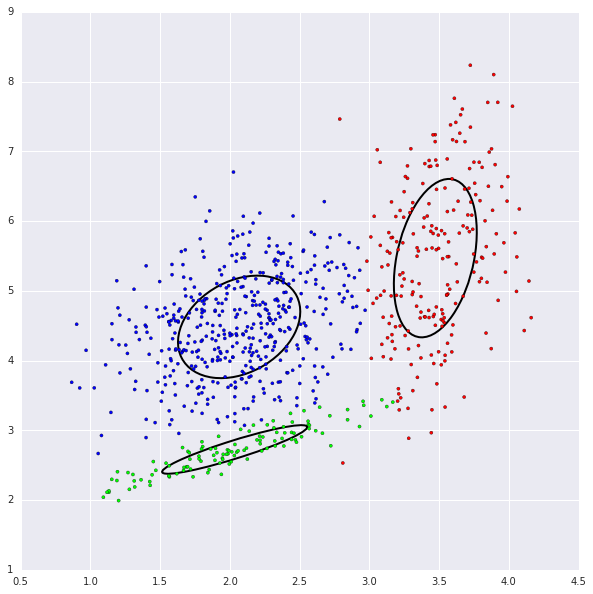

In [30]:
#implementation using scipy
#Add more comments about what is going on in here to fully understand the problem.
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = plt.gca()
    
    # Convert covariance to principal axes
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    ax.add_patch(Ellipse(position, width, height,
                             angle,facecolor="none",edgecolor="k", lw=2))
def plot_gmm(gmm, X,ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    #zorder controls the position of the ellipses
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='brg_r', zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w)

gmm = GMM(n_components=3, covariance_type='full', random_state=40)
plt.figure(figsize=(10,10))
plot_gmm(gmm, data)

K-means converged after 7 iterations.
Initial NLL = 2251.50339053
EM converged after 47 iterations
Final NLL = 1830.93098304


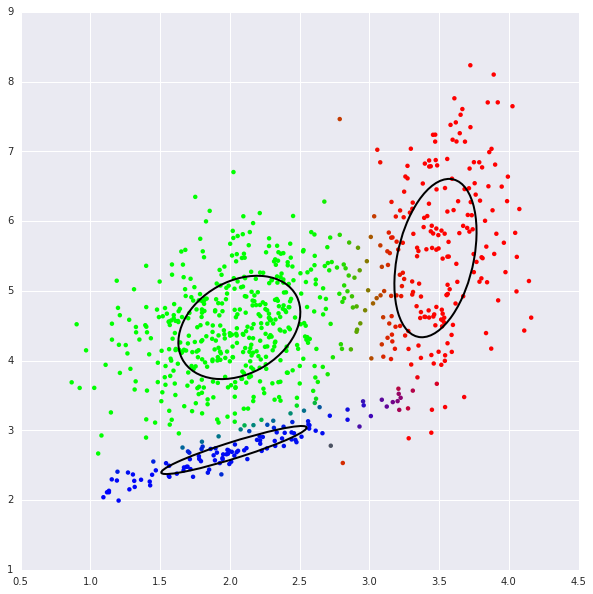

In [23]:
#Set up the mixture 
mixture = mog.MixtureModel(3,data)

#fit the mixture model
mixture.run_kmeans()
mixture.run_em()

plt.figure(figsize=(10,10))
plt.scatter(data[:,0], data[:,1], marker="o", 
            c=[tuple(mixture.rs[i,:]) for i in range(data.shape[0])],
            s=20., edgecolor='none')

# Plot the covariance ellipses.
for k in range(mixture.K):
    x, y = mixture.means[k][0], mixture.means[k][1]
    U, S, V = np.linalg.svd(mixture.cov[k])
    theta = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    ellipsePlot = Ellipse(xy=[x, y], width=2 * np.sqrt(S[0]),
                          height=2 * np.sqrt(S[1]), angle=theta,
                          facecolor="none", edgecolor="k", lw=2)
    ax = plt.gca()
    ax.add_patch(ellipsePlot)

##Dataset 2

In [32]:
    # Make some random data in 2D.
    np.random.seed(150)
    means = np.array([[1.1, 6.5],
                      [2.5, 4.7],
                      #[3.0, 2.6],
                      [3.0, 3.3]])
    covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
                   np.array([[0.35, 0.22], [0.22, 0.20]]),
                   #np.array([[0.06, 0.05], [0.05, 1.30]]),
                   np.array([[0.06, 0.05], [0.05, 1.30]])]
    amplitudes = [4, 1, 3]
    factor = 100

    data = np.zeros((1, 2))
    for i in range(len(means)):
        data = np.concatenate([data,
            np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
    data = data[1:, :]

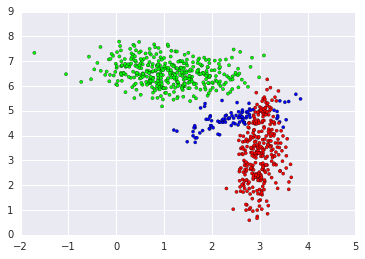

In [33]:
gmm = GMM(n_components=3).fit(data)
labels = gmm.predict(data)
plt.scatter(data[:,0], data[:,1], s=10, c = labels, cmap='brg_r')

probs = gmm.predict_proba(data)

K-means converged after 10 iterations.
Initial NLL = 2507.37988943
EM converged after 27 iterations
Final NLL = 1993.26546014


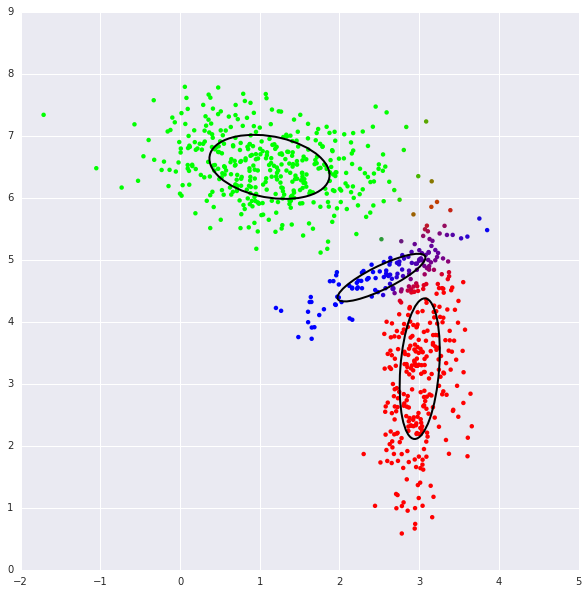

In [34]:
#Set up the mixture 
mixture = mog.MixtureModel(3,data)

#fit the mixture model
mixture.run_kmeans()
mixture.run_em()

plt.figure(figsize=(10,10))
plt.scatter(data[:,0], data[:,1], marker="o", 
            c=[tuple(mixture.rs[i,:]) for i in range(data.shape[0])],
            s=20., edgecolor='none')

# Plot the covariance ellipses.
for k in range(mixture.K):
    x, y = mixture.means[k][0], mixture.means[k][1]
    U, S, V = np.linalg.svd(mixture.cov[k])
    theta = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    ellipsePlot = Ellipse(xy=[x, y], width=2 * np.sqrt(S[0]),
                          height=2 * np.sqrt(S[1]), angle=theta,
                          facecolor="none", edgecolor="k", lw=2)
    ax = plt.gca()
    ax.add_patch(ellipsePlot)

Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

# Results
The output for the Dataset1 can look like: 

<img src="files/04_Exercise1_MoG_EM.png">